# Homework 8
### Polysplines - Spline interpolation

We are given a system with the data points <br>
$$
f(0) = 0,\; f(1) = 2,\; f(2) = 1
$$
And we are asked to use spline interpolation with both natural and clamp
boundary conditions. We start with natural

In [20]:
import numpy as np
from matplotlib import pyplot as plt

In [59]:
A = np.array([[0, 0, 0, 1, 0, 0, 0, 0],  # f1(0) = 0
              [1, 1, 1, 1, 0, 0, 0, 0],  # f1(1) = 2
              [0, 0, 0, 0, 1, 1, 1, 1],  # f2(1) = 2
              [0, 0, 0, 0, 8, 4, 2, 1],  # f2(2) = 1
              [3, 2, 1, 0,-3,-2,-1, 0],  # continuity of fn'
              [6, 2, 0, 0,-6,-2, 0, 0],  # continuity of fn''
              [0, 2, 0, 0, 0, 0, 0, 0],  # natural for f1
              [0, 0, 0, 0,12, 2, 0, 0]]) # natural for f2

b = np.array([0, 2, 2, 1, 0, 0, 0, 0])

In [60]:
c = np.linalg.solve(A, b)
print(c)

[-0.75  0.    2.75  0.    0.75 -4.5   7.25 -1.5 ]


In [61]:
for i in range(len(c)):
    if c[i] >= 0:
        print("", round(c[i], 4))
    else:
        print(round(c[i], 4))

coef2 = c[4:]
coef1 = c[:4]
coef1[0] = 0
print(coef1, coef2)

-0.75
 0.0
 2.75
 0.0
 0.75
-4.5
 7.25
-1.5
[0.   0.   2.75 0.  ] [ 0.75 -4.5   7.25 -1.5 ]


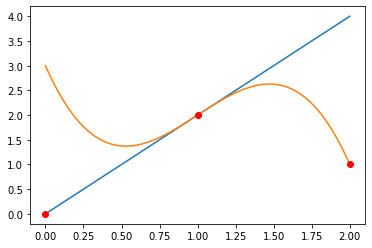

In [55]:
x = np.linspace(0, 2, 10000)
plt.plot(x, x**3 * coef1[0] + x**2 * coef1[1] + x * coef1[2] + coef1[3])
plt.plot(x, x**3 * coef2[0] + x**2 * coef2[1] + x * coef2[2] + coef2[3])

plt.plot(0, 0, marker="o", color="red")
plt.plot(1, 2, marker="o", color="red")
plt.plot(2, 1, marker="o", color="red")



We can do the clamped boundary now

In [56]:
A = np.array([[0, 0, 0, 1, 0, 0, 0, 0],  # f1(0) = 0
              [1, 1, 1, 1, 0, 0, 0, 0],  # f1(1) = 2
              [0, 0, 0, 0, 1, 1, 1, 1],  # f2(1) = 2
              [0, 0, 0, 0, 8, 4, 2, 1],  # f2(2) = 1
              [3, 2, 1, 0,-3,-2,-1, 0],  # continuity of fn'
              [6, 2, 0, 0,-6,-2, 0, 0],  # continuity of fn''
              [0, 0, 1, 0, 0, 0, 0, 0],  # clamped for f1
              [0, 0, 0, 0,12, 4, 1, 0]]) # clamped for f2

b = np.array([0, 2, 2, 1, 0, 0, 0, 0])

In [57]:
c = np.linalg.solve(A, b)
print(c)

[-3.25000000e+00  5.25000000e+00  0.00000000e+00 -1.33226763e-15
  2.75000000e+00 -1.27500000e+01  1.80000000e+01 -6.00000000e+00]


In [58]:
for i in range(len(c)):
    if c[i] >= 0:
        print("", round(c[i], 4))
    else:
        print(round(c[i], 4))

-3.25
 5.25
 0.0
-0.0
 2.75
-12.75
 18.0
-6.0
